In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('C:/Users/Admin/Downloads')

In [51]:
pwd

'C:\\Users\\Admin\\Downloads'

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
data.shape

(404290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<b>OBSERVATION</b>
<b> question2 has null values in two rows </b>

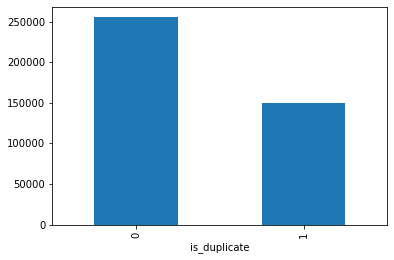

In [10]:
data.groupby('is_duplicate')['id'].count().plot.bar()

<b>OBSERVATIONS</b>

-there are more number of pairs which are dissimilar compared to the number of similar pairs in the dataset.

-similar pairs-37%

-dissmilar pairs-63%

In [26]:
df=data.dropna()
df.shape

(404287, 6)

In [29]:
qids=pd.Series(df['question1'].tolist(),df['question2'].tolist())
qs_unique=len(np.unique(qids))
print("no of unique questions",qs_unique)

qs_morethan_onetime=np.sum(qids.value_counts()>1)
print('questions which appear more than once',qs_morethan_onetime)

percentage=(qs_morethan_onetime/qs_unique)*100
print('percentage of questions more than once',percentage)



no of unique questions 290455
questions which appear more than once 54131
percentage of questions more than once 18.636621851921984


AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

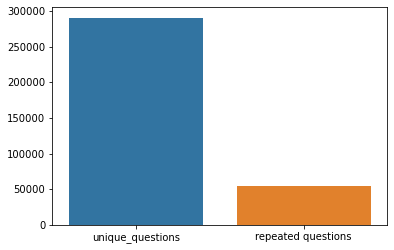

In [31]:
x=['unique_questions','repeated questions']
y=[qs_unique,qs_morethan_onetime]

sns.barplot(x,y)
plt.title('plot showing number of unique and repeating questions')
plt.show()

In [40]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pair_duplicates.shape[0]-df.shape[0])

0


Text(0, 0.5, 'no od questions')

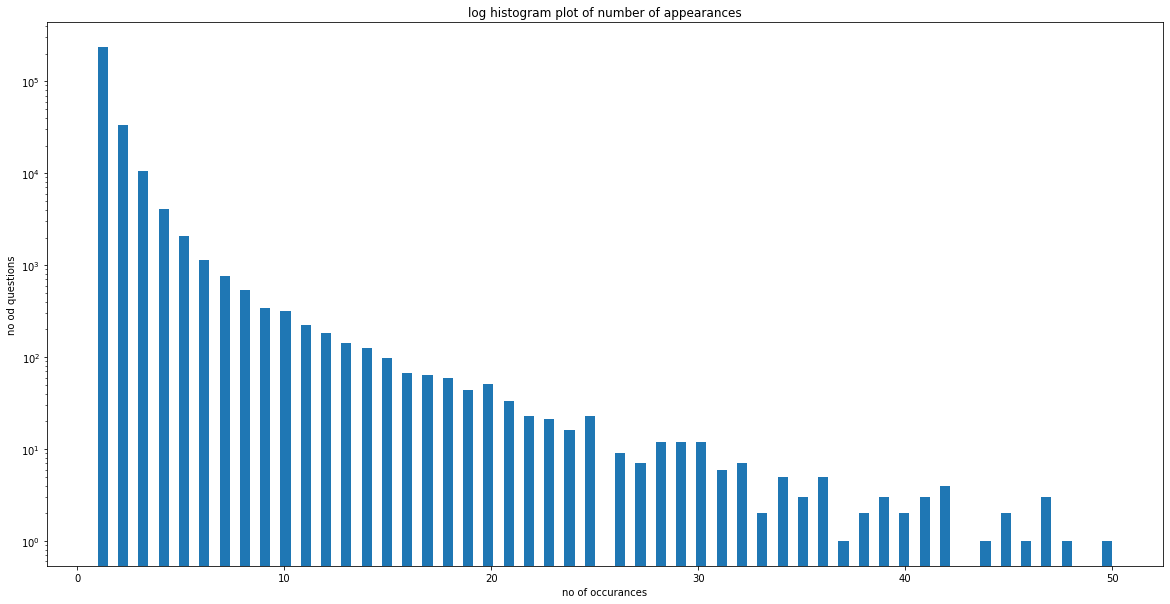

In [45]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=100)
plt.yscale('log')
plt.title('log histogram plot of number of appearances')
plt.xlabel('no of occurances')
plt.ylabel('no od questions')

<b>FEATURE ENGINEERING</b>

In [49]:
if os.path.isfile('df_new_features'):
    df=pd.read_csv('df_new_features.csv',encoding='latin-1')
else:
    df['freq_id1']=df.groupby('qid1')['qid1'].transform('count')
    df['freq_id2']=df.groupby('qid2')['qid2'].transform('count')
    df['q1_len']=df['question1'].str.len()
    df['q2_len']=df['question2'].str.len()
    df['q1_n_words']=df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words']=df['question2'].apply(lambda row: len(row.split(" ")))
    
    def common_words(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*len(w1 & w2)
    df['word_common']=df.apply(common_words,axis=1)
    
    def word_total(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*(len(w1)+len(w2))
    df['word_total']=df.apply(word_total,axis=1)
    
    def word_share(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*(len(w1 & w2)/(len(w1)+len(w2)))
    df['word_share']=df.apply(word_share,axis=1)
    
    df['freq1+2']=df['freq_id1']+df['freq_id2']
    df['freq1-2']=df['freq_id1']-df['freq_id2']
    
    df.to_csv('df_new_features.csv',index=False)

    
df.head()    
    
        
        
    
    

<ipython-input-49-8c0328ee66ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_id1']=df.groupby('qid1')['qid1'].transform('count')
<ipython-input-49-8c0328ee66ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_id2']=df.groupby('qid2')['qid2'].transform('count')
<ipython-input-49-8c0328ee66ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,freq_id2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq1+2,freq1-2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


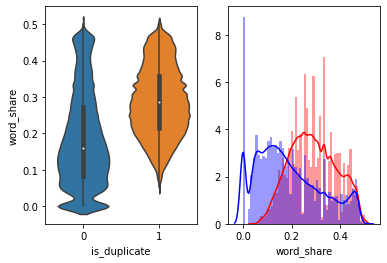

In [50]:
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_share'][0:],label="1",color="red")
sns.distplot(df[df['is_duplicate']==0.0]['word_share'][0:],label="0",color="blue")
plt.show()

<b>word share can be a important feature in the model which we are going to build</b> 

<h3>TEXT PREPROCESSING</h3>